In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [51]:
current_dir = os.getcwd()
results = pd.read_csv(current_dir + '/MISA/results/mosei_MISA_confidNet_mse_epoch(10)_test_results_process_all_zero_version.csv')

In [52]:
'''confidNet results
labels: ['happiness', 'sadness', 'anger', 'fear', 'disgust', 'surprise']
'''
results.head()

,id,input_text,emo_label,predict,confid_loss,target_tcp,tcp_TVA,tcp_VA,tcp_TA,tcp_TV,tcp_T,tcp_V,tcp_A
0,-6rXp3zJ3kc[1],very aware of many people are not until they g...,[0. 1. 0. 0. 0. 0.],[0.4431073 0.46878022 0.4065615 0.32502323 0...,0.015859,0.468780,0.518895,0.999669,0.999672,0.988800,1.0,1.000000,0.032416
1,-AUZQgSxyPQ[0],the perfect soul mate to the spot therapy brus...,[0. 0. 0. 0. 0. 1.],[0.66089416 0.31543863 0.24970335 0.2167082 0...,0.015859,0.259558,0.481128,0.688649,0.999696,0.967914,1.0,0.999952,0.006075
2,-6rXp3zJ3kc[2],so the answer to the question can i contribute...,[0. 1. 0. 0. 0. 0.],[0.47769096 0.38564548 0.35541895 0.24444269 0...,0.015859,0.385645,0.479709,0.988340,0.999980,0.976709,1.0,0.999999,0.035715
3,-MeTTeMJBNc[3],picture maybe you could find a picture of the ...,[1. 0. 0. 1. 0. 0.],[0.50814235 0.3925047 0.30679223 0.30635655 0...,0.015859,0.407249,0.503299,0.436472,0.999589,0.950047,1.0,0.998945,0.001465
4,-RfYyzHpjk4[3],time you can use it for personal use family fr...,[1. 0. 1. 0. 1. 0.],[0.59833455 0.29737994 0.23632406 0.18584965 0...,0.015859,0.317681,0.481272,0.989681,1.000000,0.998917,1.0,0.999991,0.051900


In [53]:
print(len(results))

4654


In [54]:
results['emo_label'].loc[lambda x: x =='[0. 0. 0. 0. 0. 0.]'].count()

701

In [55]:
print(np.mean(results['confid_loss']))

0.014813698219878973


In [56]:
text_is_noise = results[results['tcp_VA'] > results['tcp_TVA']]
audio_is_noise = results[results['tcp_TA'] > results['tcp_TVA']]
video_is_noise = results[results['tcp_TV'] > results['tcp_TVA']]

In [57]:
# Modality noise counts with no label rows dropped
print("Total counts: ", results.shape[0])
print("Textual noise counts: ", text_is_noise.shape[0])
print("Visual noise counts: ", video_is_noise.shape[0])
print("Audio noise counts: ", audio_is_noise.shape[0])

Total counts:  4654
Textual noise counts:  4444
Visual noise counts:  3516
Audio noise counts:  4650


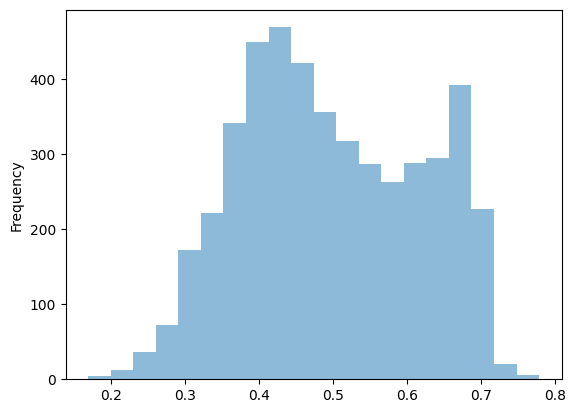

In [58]:
ax = results['target_tcp'].plot.hist(bins=20, alpha=0.5)

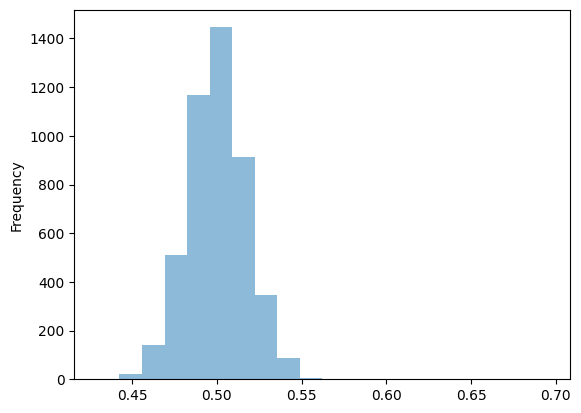

In [59]:
ax = results['tcp_TVA'].plot.hist(bins=20, alpha=0.5)

In [60]:
df = pd.DataFrame({
    'tcp_TVA': results['tcp_TVA'],
    'tcp_TA': results['tcp_TA'],
    'tcp_TV': results['tcp_TV'],
    'tcp_VA': results['tcp_VA'],
    'tcp_T': results['tcp_T'],
    'tcp_V': results['tcp_V'],
    'tcp_A': results['tcp_A']
})

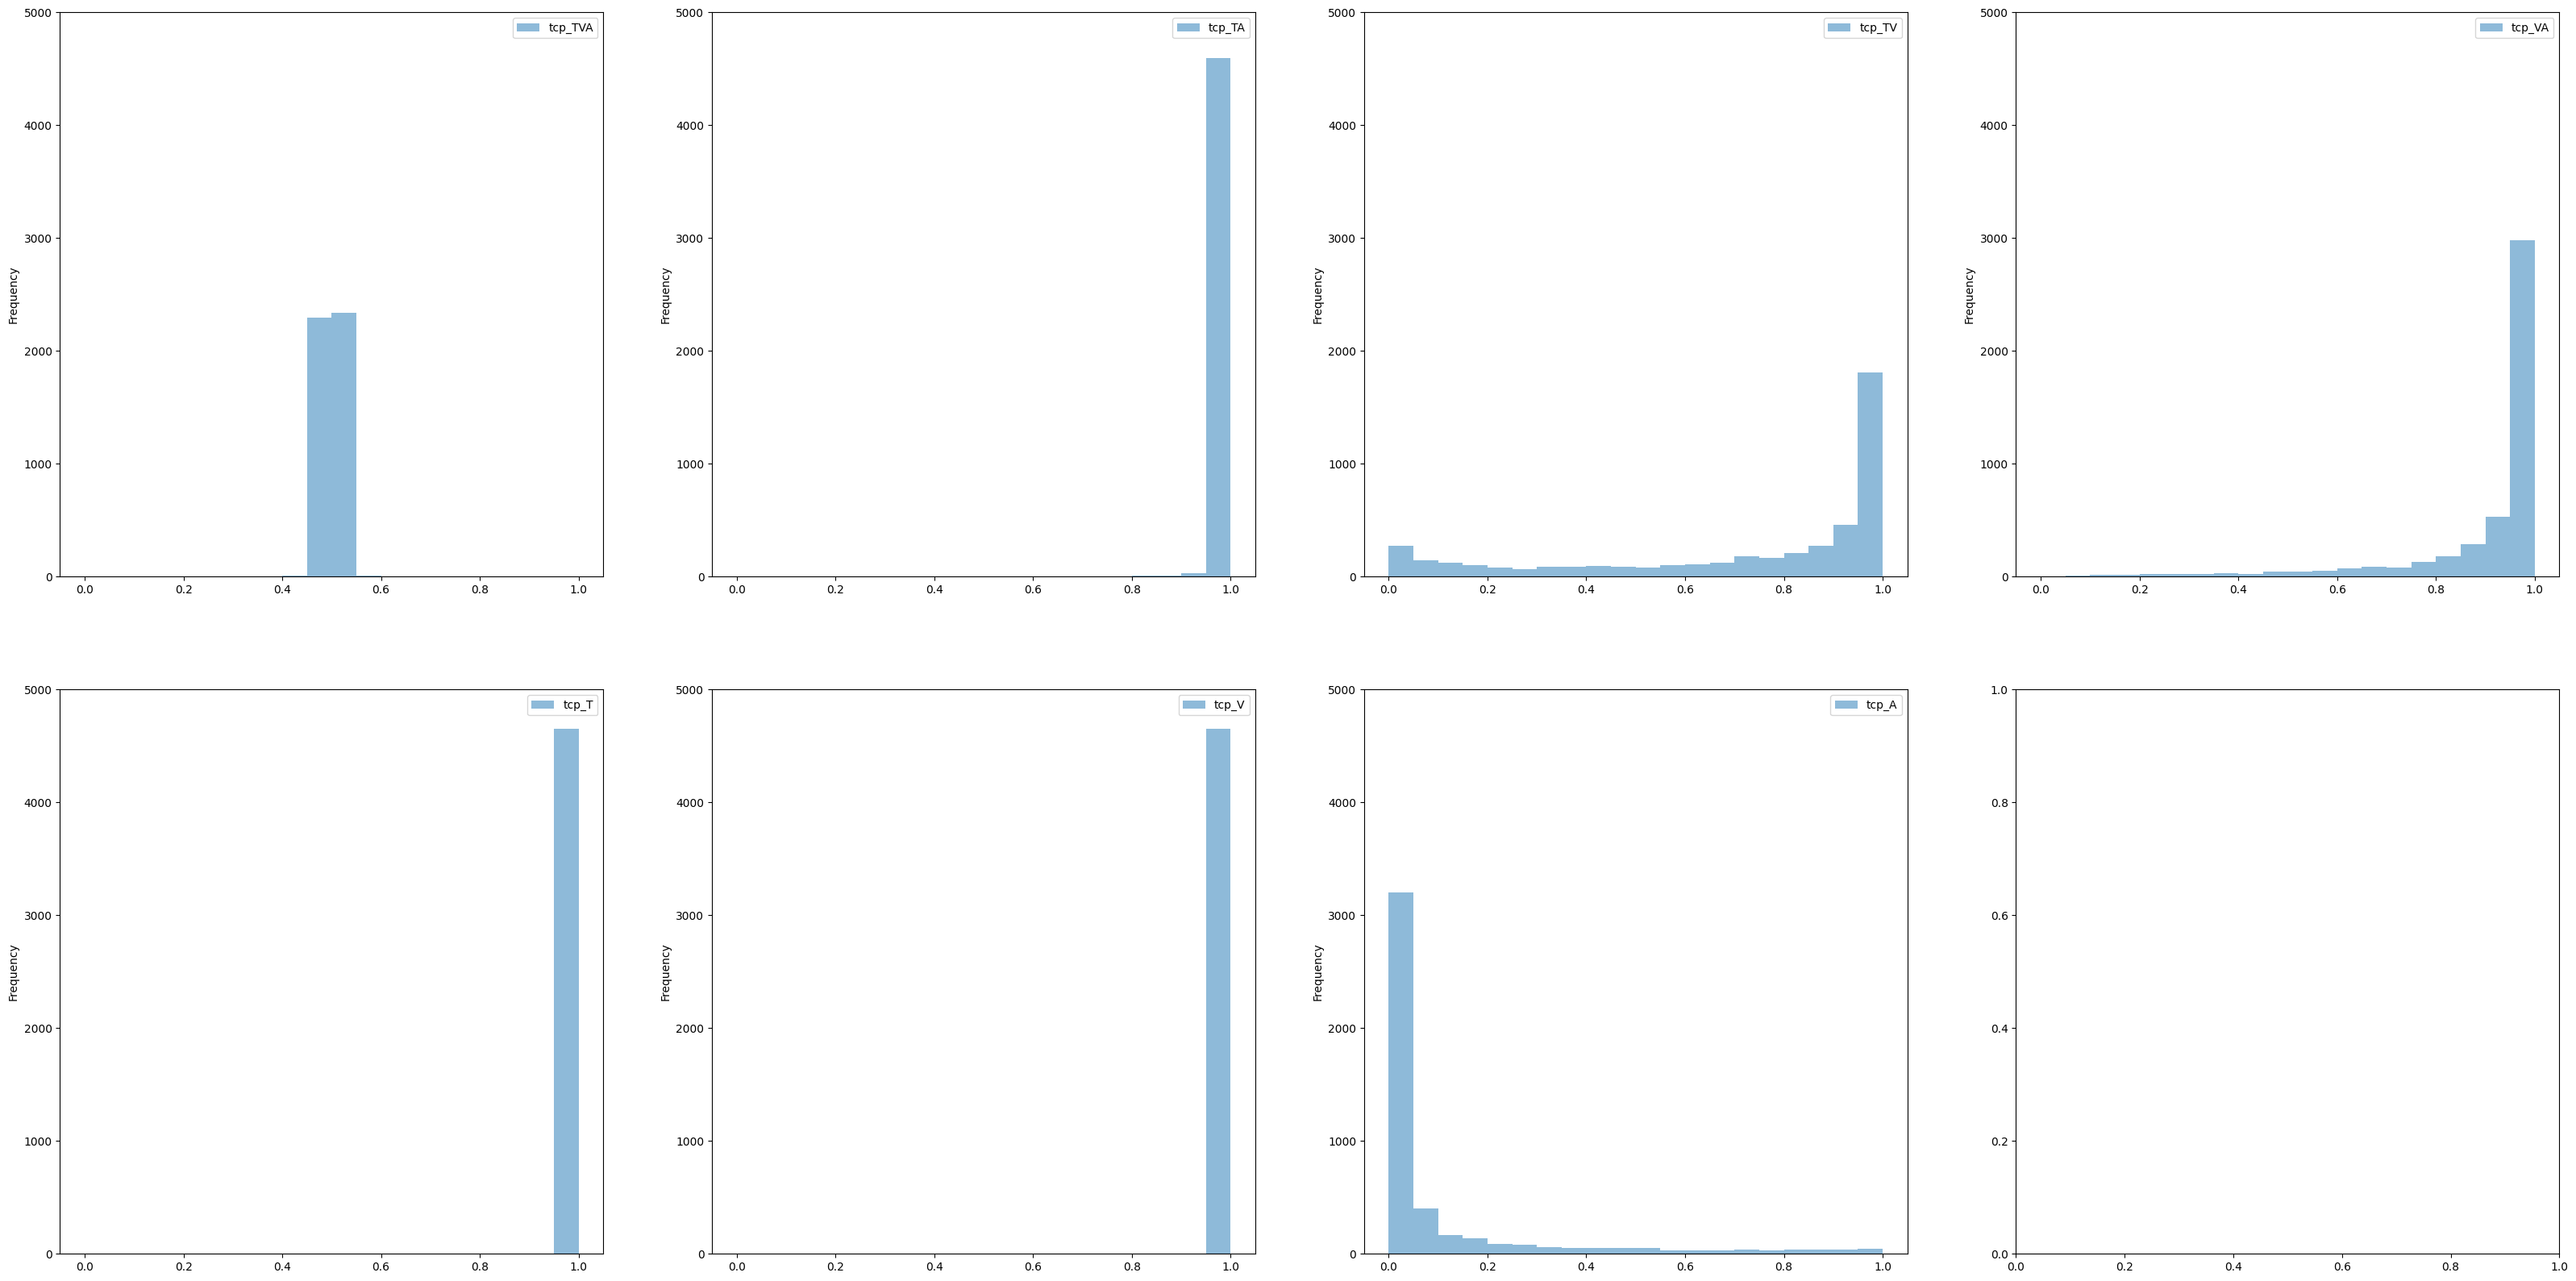

In [25]:
fig, ax = plt.subplots(2, 4, figsize=(40, 20))
m=0
for i in range(2):
    for j in range(4):
        df.plot.hist(column=df.columns[m], bins=20, ax=ax[i,j], alpha=0.5, ylim=(0, 5000))
        m+=1
        if m == 7:
            break

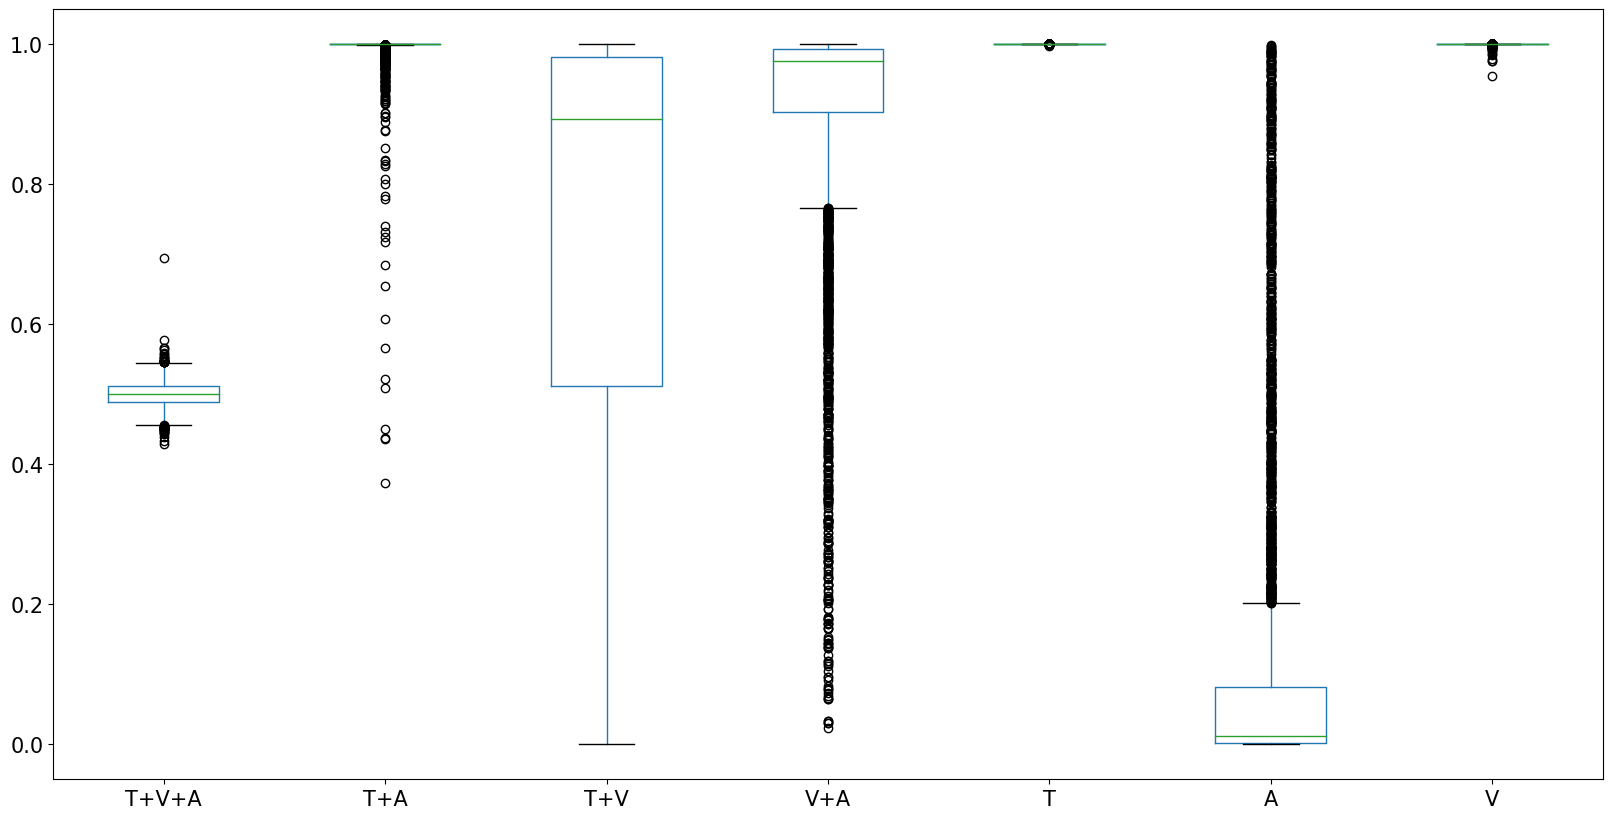

In [29]:
df = pd.DataFrame({'T+V+A': results['tcp_TVA'], 'T+A': results['tcp_TA'], 'T+V': results['tcp_TV'], 'V+A': results['tcp_VA'], 'T': results['tcp_T'], 'V': results['tcp_V'], 'A': results['tcp_A']})  
box_plot = df.boxplot(column=['T+V+A', 'T+A', 'T+V', 'V+A', 'T', 'A', 'V'], figsize=(20, 10), grid=False, fontsize=15)

Text(0, 0.5, 'Mean TCP')

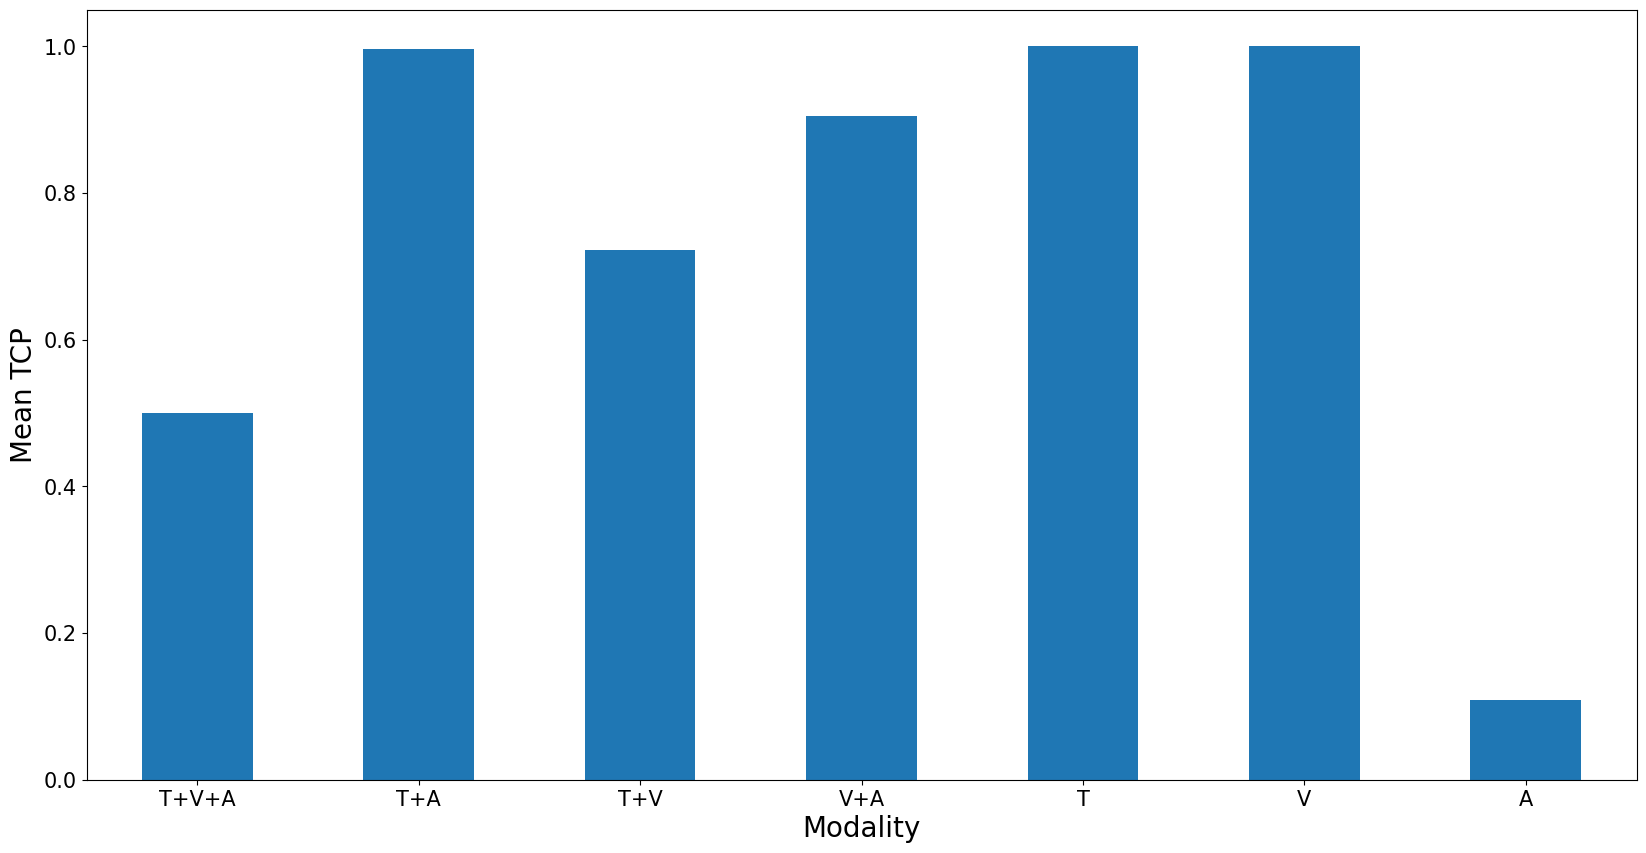

In [27]:
df = pd.Series({
    'T+V+A': np.mean(results['tcp_TVA']), 
    'T+A': np.mean(results['tcp_TA']), 
    'T+V': np.mean(results['tcp_TV']), 
    'V+A': np.mean(results['tcp_VA']), 
    'T': np.mean(results['tcp_T']),
    'V': np.mean(results['tcp_V']), 
    'A': np.mean(results['tcp_A'])
    })  
# histogram of the data
ax = df.plot.bar(figsize=(20, 10), fontsize=15, rot=0)
ax.set_xlabel("Modality", fontsize=20)
ax.set_ylabel("Mean TCP", fontsize=20)

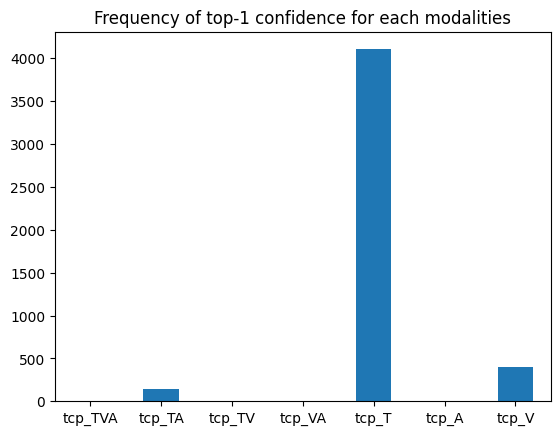

In [38]:
# Frequency of top-1 confidence for each modalities
columns = ['tcp_TVA', 'tcp_TA', 'tcp_TV', 'tcp_VA', 'tcp_T', 'tcp_A', 'tcp_V']
results['top_1_column'] = results[['tcp_TVA','tcp_TV','tcp_TA', 'tcp_VA', 'tcp_T', 'tcp_A', 'tcp_V']].idxmax(axis=1)
df = results['top_1_column'].value_counts(sort=False)
for i in columns:
    if i not in df.index:
        df[i] = 0
ax = df.loc[columns].plot.bar(rot=0, x=columns, title="Frequency of top-1 confidence for each modalities")

<Axes: title={'center': 'Frequency of top-1 confidence for each modalities'}>

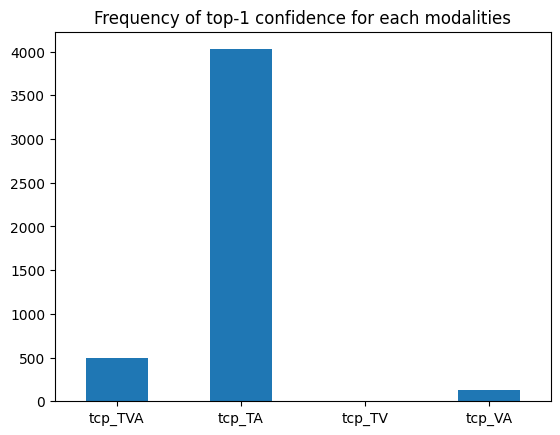

In [ ]:
columns = ['tcp_TVA', 'tcp_TA', 'tcp_TV', 'tcp_VA']
results['top_1_column'] = results[['tcp_TVA','tcp_TV','tcp_TA', 'tcp_VA']].idxmax(axis=1)
df = results['top_1_column'].value_counts(sort=False)
df.loc[columns].plot.bar(rot=0, x=columns, title="Frequency of top-1 confidence for each modalities")